EMPLOYEE ATTRITION ANALYSIS - (using IBM Attrition dataset)

IMPORT LIBRARIES

In [175]:
#install packages initially prior to import for analysis
#pip install -U scikit-learn
#pip install seaborn
#pip install matplotlib
#pip install xgboost
#pip install plotly
#pip install cufflinks==0.8.2
#pip install chart_studio

In [2]:
# for data analysis 

In [214]:
import pandas as pd # for creating data frames
import numpy as np # for linear algebra 
from scipy import stats # for statistical functions and probability distributions 
from scipy.stats import norm, skew 

In [4]:
# for data visualisations

In [215]:
import seaborn as sns #visualisation tool ( KDE and heatmap)
import matplotlib.pyplot as plt # matplotlib and pyplot for charts 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
#for model processing 

In [216]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder # categorical to continous for including in analysis
from sklearn.model_selection import train_test_split # import scikit train and test data splitter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

In [ ]:
# for data modeling (analysis using statistical models)

In [217]:
    from sklearn import svm, tree, linear_model, neighbors  #support vector machine (classification)
                                                        #decision tree (used for classification)
                                                        #linear_model - used for lin models like log reg, ridge, 
                                                        #-contd lasso etc (classification)
                                                        #neighbors - used for k nearest neighbors(classification)
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process 
                                                        #naive bayes - probabilistic classification
                                                        #ensemble - prediction
                                                        #discriminant analysis - dim reduction / classification
                                                        #gaussian process - stochastic process - modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#sklearn packages for deriving accuracy metrics

In [218]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
#sklearn packages for modeling 

In [219]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
#other misc packages 

In [220]:
import os
import re
import sys
import timeit
import string
from datetime import datetime 
from time import time 
from dateutil.parser import parse 

IMPORT IBM ATTRITION DATABASE FOR ANALYSIS

In [221]:
main = pd.read_csv('/home/sajay/Documents/HR-Attrition.csv') # import code

In [ ]:
#Basic analysis to see the data structure and make a copy of the file 

In [183]:
main.shape # to see the number of rows and columns 

(1470, 35)

In [222]:
copy1 = main.copy() # making a copy of the file for analysis purpose 

In [ ]:
#check for any null cells 

In [223]:
display(copy1.isnull().any()) # since this is pre-prepared file, there are no null values in the file 

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
# segregate the database as type (int, categorical)

In [186]:
copy1.dtypes # all the types of data types 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [187]:
#show groups separately
copy1.columns.to_series().groupby(copy1.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [188]:
#check the data sample
copy1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [189]:
#check the data tail 
copy1.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [190]:
#Find the basic statistical data such as mean, std deviation, count and min and max values 
copy1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [191]:
#drop useless column
copy1 = copy1.drop(columns = ['Over18'])

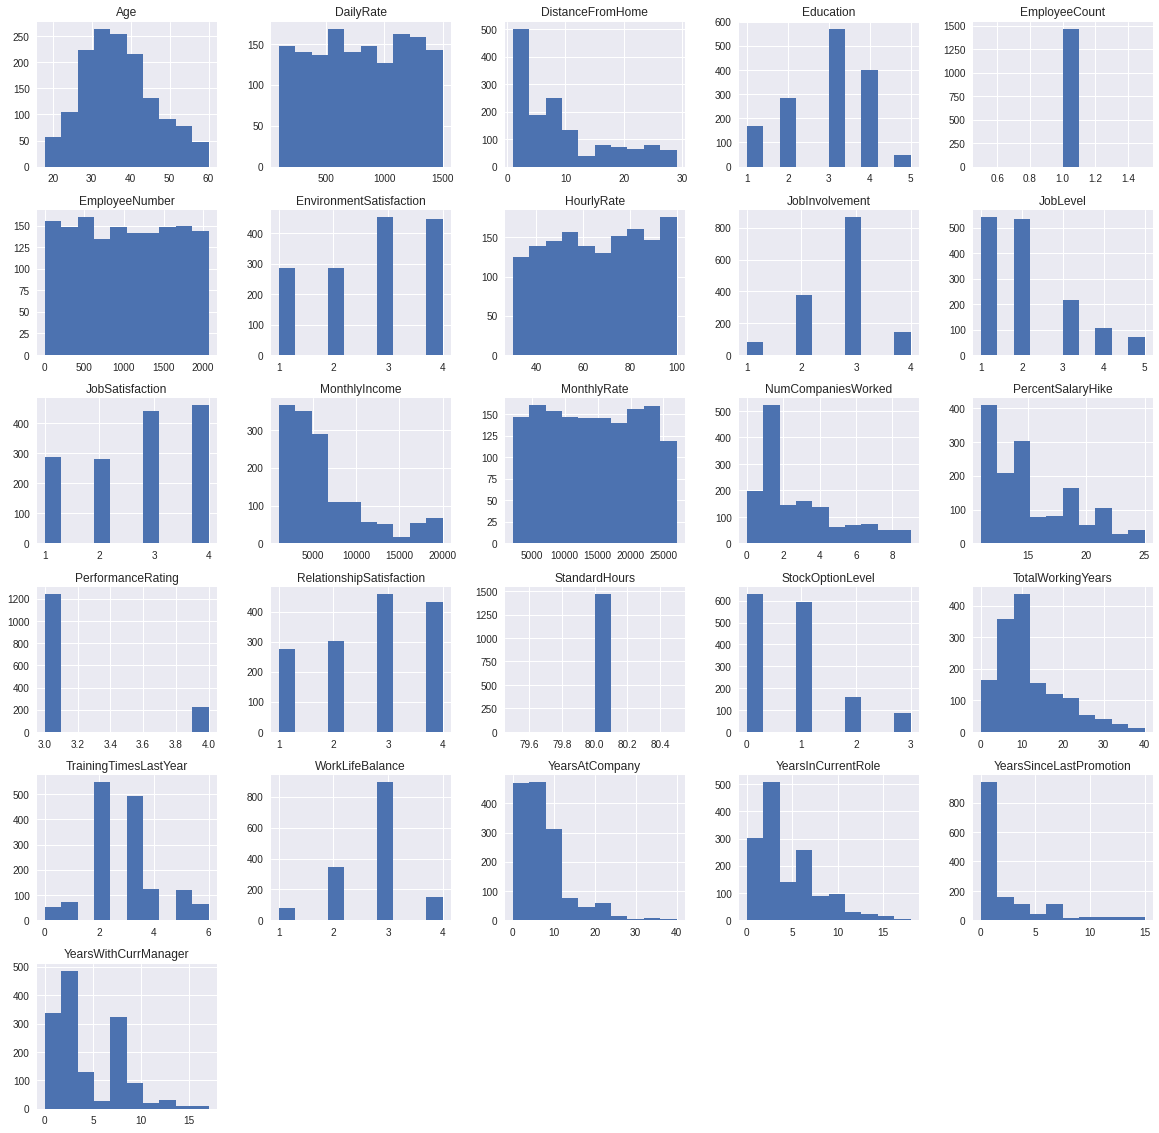

In [192]:
# make histogram for all the values showing the distribution ( preference for normal distribution)
copy1.hist(figsize=(20,20))
plt.show()

In [ ]:
#INITIAL CONCLUSIONS 

Age : approximately normally distributed 25 to 75th percentile are approximately between 25 and 45
total working years : very skewed to the right which would require to be normalised to be of any use 


In [224]:
#drop Standard HOurs and EMployee count basis the conclusions from histogram
copy1 = copy1.drop(columns = ['StandardHours', 'EmployeeCount'])

In [ ]:
#EDA OF COLUMNS 

AGE

In [225]:
#CHECKING THE AGE DISTRIBUTION FOR CURRENT AND EX-EMPLOYEES 
(mu, sigma) = norm.fit(copy1.loc[copy1['Attrition'] == 'Yes', 'Age']) # mu, sigma are mean and standard deviation
print(mu,sigma)
(mu, sigma) = norm.fit(copy1.loc[copy1['Attrition'] == 'No', 'Age'])
print(mu,sigma)
#CONCLUSION : EX EMPLOYEES MEAN IS 33.6 AND STD DEVIATION IS 9.66 ,
# CURRENT EMPLOYEES MEAN IS 37.56 AND STD DEVIATION IS 8.88

33.607594936708864 9.668886620354689
37.561232765612324 8.884754930516747


CREATING KDE PLOTS (COLUMNS VS ATTRITION) - KDE plots (kernel density estimation will help us to see is there is a correlation between each of the columns and attrition to understand. x axis will be the column data and y axis will be the probability density which is measued from 0 to 1

In [ ]:
# Creating a KDE Plot for age 

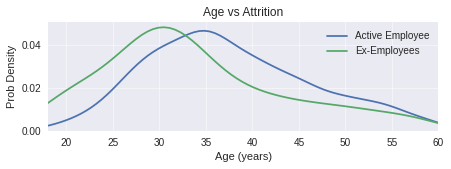

In [195]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Prob Density')# measured from 0 to 1
plt.title('Age vs Attrition');

EDUCATION

In [226]:
# Education background of staff
copy1['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
#Multiple count plots for segregating as per active and resigned 

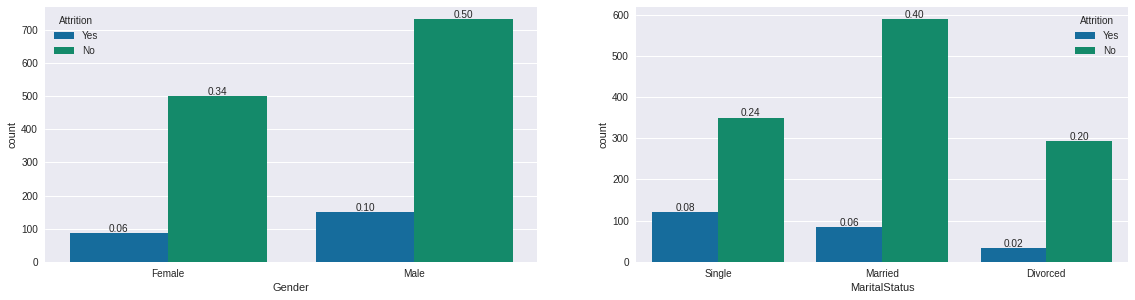

In [227]:
total= len(copy1)
columns = ["Gender","MaritalStatus",]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

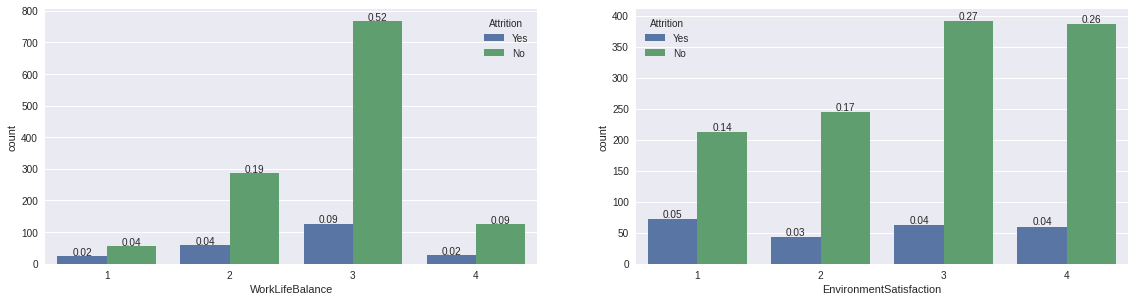

In [198]:
total= len(copy1)
columns = ["WorkLifeBalance","EnvironmentSatisfaction"]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

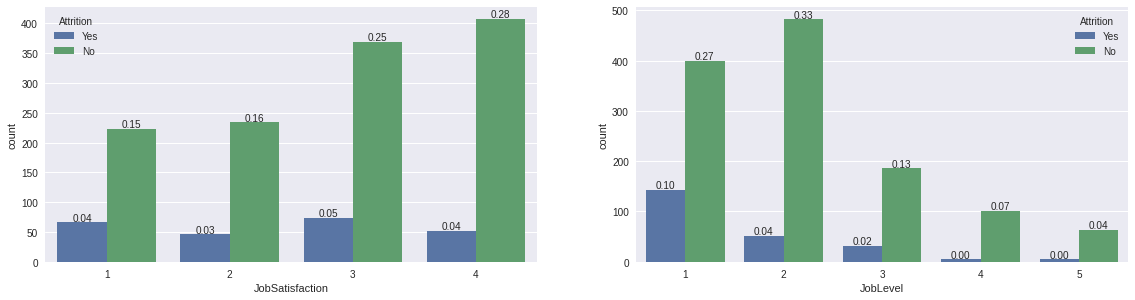

In [199]:
total= len(copy1)
columns = ["JobSatisfaction",
           "JobLevel",]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

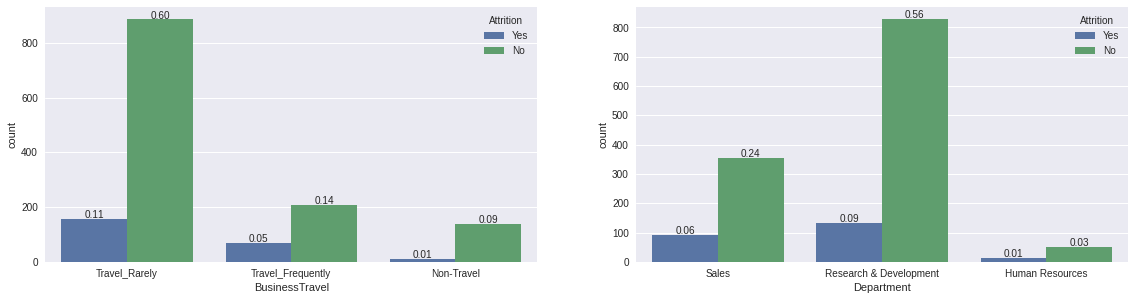

In [200]:
total= len(copy1)
columns = ["BusinessTravel","Department"]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

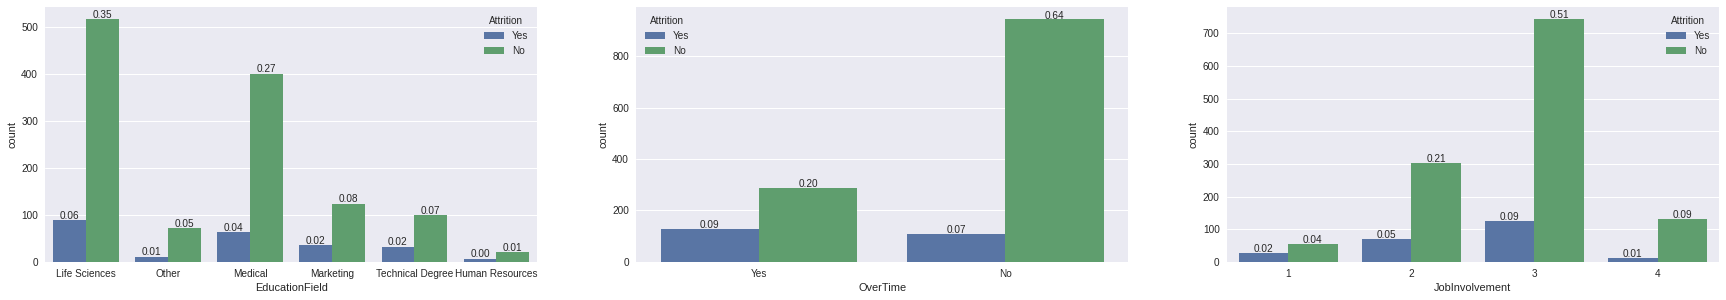

In [201]:
total= len(copy1)
columns = ["EducationField","OverTime","JobInvolvement"]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(hrdata[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

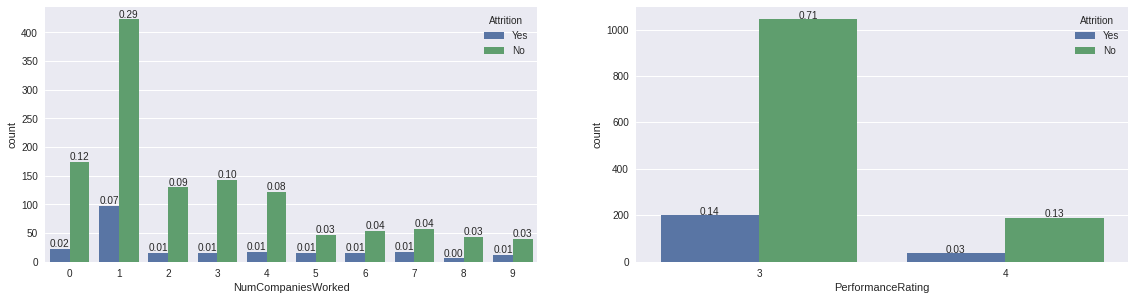

In [202]:
total= len(copy1)
columns = ["NumCompaniesWorked", "PerformanceRating"]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(copy1[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

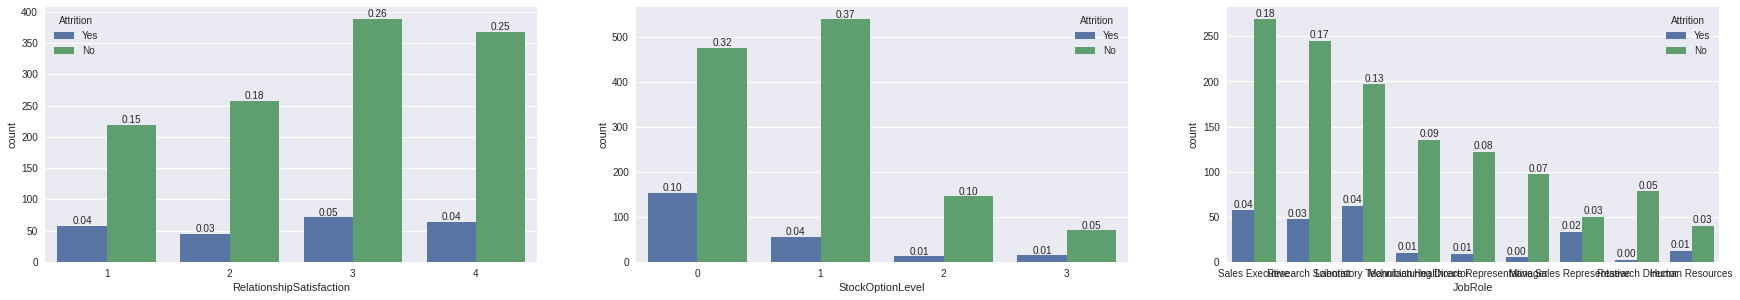

In [203]:
total= len(copy1)
columns = ["RelationshipSatisfaction", "StockOptionLevel", "JobRole"]
plt.figure(figsize=(30,10))
j=0
for i in columns:
    j +=1
    plt.subplot(7,3,j)
    #sns.countplot(copy1[i])
    ax1 = sns.countplot(data=copy1,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [204]:
print("Number of current employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    copy1[copy1['Attrition'] == 'No'].shape[0] / copy1.shape[0]*100,
    copy1[copy1['Attrition'] == 'Yes'].shape[0] / copy1.shape[0]*100))

Number of current employees is 83.9% and of Ex-employees is: 16.1%


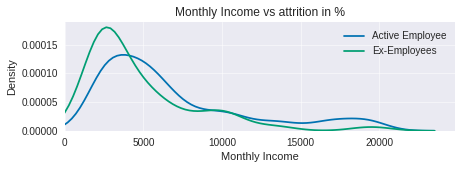

In [205]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income vs attrition in %');

In [206]:
print("Employee Hourly Rate is between from ${} to ${}.".format(
    copy1['HourlyRate'].min(), copy1['HourlyRate'].max()))

Employee Hourly Rate is between from $30 to $100.


In [207]:
print("Employee Daily Rate is between ${} to ${}.".format(
    copy1['DailyRate'].min(), copy1['DailyRate'].max()))

Employee Daily Rate is between $102 to $1499.


In [208]:
print("Employee Monthly Rate is between from ${} to ${}.".format(
    copy1['MonthlyRate'].min(), copy1['MonthlyRate'].max()))

Employee Monthly Rate is between from $2094 to $26999.


In [ ]:
#standard hours for all is 80 hours 

YEARS AT WORK COMPARISONS 

Number of Years is between 0 to 40 years.


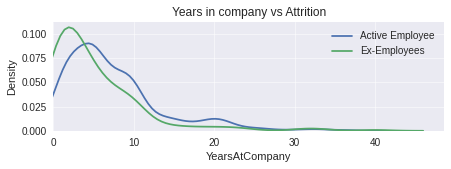

In [138]:
print("Number of Years is between {} to {} years.".format(
    copy1['YearsAtCompany'].min(), copy1['YearsAtCompany'].max()))

plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years in company vs Attrition');

Number of Years in current role is between 0 to 18 years.


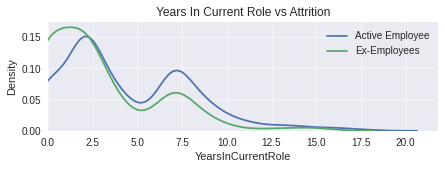

In [150]:
print("Number of Years in current role is between {} to {} years.".format(
    copy1['YearsInCurrentRole'].min(), copy1['YearsInCurrentRole'].max()))

plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role vs Attrition');

Years since last promotion is between 0 to 15 years.


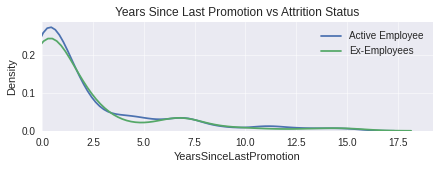

In [153]:
print("Years since last promotion is between {} to {} years.".format(
    copy1['YearsSinceLastPromotion'].min(), copy1['YearsSinceLastPromotion'].max()))

plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion vs Attrition Status');

Total working years is between 0 to 40 years.


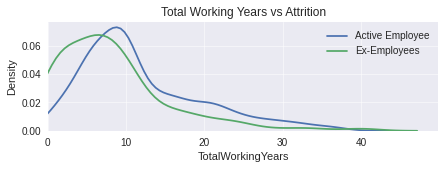

In [156]:
print("Total working years is between {} to {} years.".format(
    copy1['TotalWorkingYears'].min(), copy1['TotalWorkingYears'].max()))

plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years vs Attrition');

Number of Years with current manager is between 0 to 17 years.


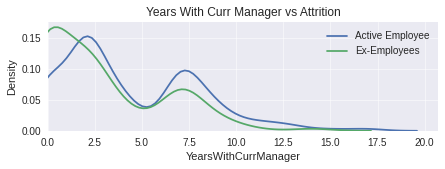

In [157]:
print("Number of Years with current manager is between {} to {} years.".format(
    copy1['YearsWithCurrManager'].min(), copy1['YearsWithCurrManager'].max()))

plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager vs Attrition');

In [ ]:
#Distance from home 


In [161]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} kms.".format(copy1['DistanceFromHome'].min(),
                                                                                       copy1['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 kms.


In [162]:
print('Average distance from home for currently active employees: {:.2f} kms and ex-employees: {:.2f} kms'.format(
    copy1[copy1['Attrition'] == 'No']['DistanceFromHome'].mean(), copy1[copy1['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 kms and ex-employees: 10.63 kms


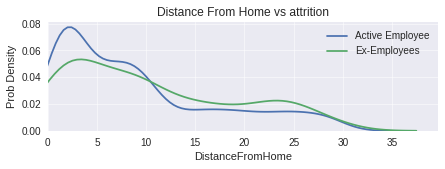

In [127]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Prob Density')
plt.title('Distance From Home vs attrition');

In [160]:
print("Number of training times is between {} to {} years.".format(
    copy1['TrainingTimesLastYear'].min(), copy1['TrainingTimesLastYear'].max()))

Number of training times is between 0 to 6 years.


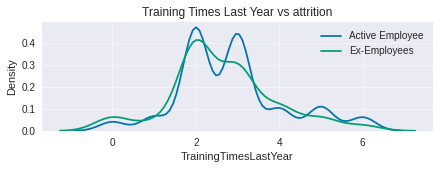

In [158]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year vs attrition');

In [ ]:
print("Number of Years at the company varies from {} to {} years.".format(
    copy1['YearsAtCompany'].min(), copy1['YearsAtCompany'].max()))

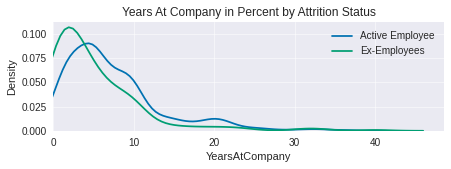

In [39]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

In [41]:
print("Number of Years in the current role varies from {} to {} years.".format(
    copy1['YearsInCurrentRole'].min(), copy1['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


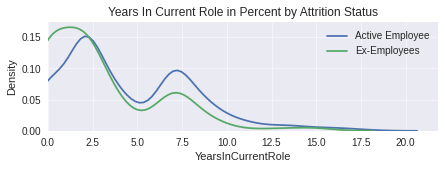

In [43]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');

In [45]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    copy1['YearsSinceLastPromotion'].min(), copy1['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


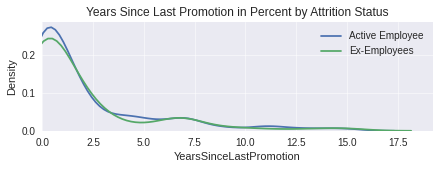

In [48]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [ ]:
print("Total working years varies from {} to {} years.".format(
    copy1['TotalWorkingYears'].min(), copy1['TotalWorkingYears'].max()))

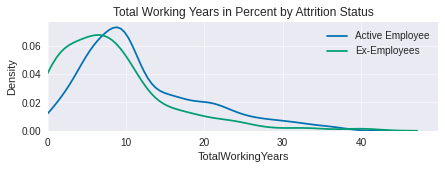

In [50]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

In [53]:
print("Number of Years with current manager varies from {} to {} years.".format(
    copy1['YearsWithCurrManager'].min(), copy1['YearsWithCurrManager'].max()))

Number of Years with current manager varies from 0 to 17 years.


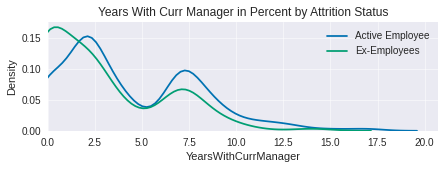

In [55]:
plt.figure(figsize=(7,2))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

Percentage Salary Hikes is between 11% to 25%.


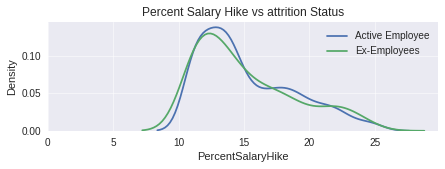

In [163]:
print("Percentage Salary Hikes is between {}% to {}%.".format(
    copy1['PercentSalaryHike'].min(), copy1['PercentSalaryHike'].max()))

plt.figure(figsize=(7,2))
plt.style.use('seaborn')
plt.grid(True, alpha=0.5)
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(copy1.loc[copy1['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike vs attrition Status');

In [62]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    copy1['HourlyRate'].min(), copy1['HourlyRate'].max()))


Employee Hourly Rate varies from $30 to $100.


In [63]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    copy1['DailyRate'].min(), copy1['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [64]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    copy1['MonthlyRate'].min(), copy1['MonthlyRate'].max()))


Employee Monthly Rate varies from $2094 to $26999.


In [59]:
# Find correlations with the target and sort
copy1_trans = copy1.copy()
copy1_trans['Target'] = copy1_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
copy1_trans = copy1_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = copy1_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<AxesSubplot:>

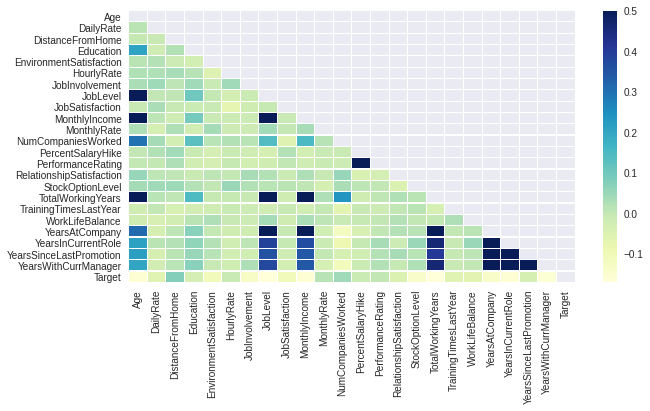

In [61]:
# Calculate correlations
corr = copy1_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")


In [ ]:
#CONCLUSIONS 
#1. Highest negative correlation is between total working years, job level, years in current role 
#2. Highest positive correlation is between performacne rating, number of companies and monthly rate
#3. majority of people left as soon as they completed 2 years after which the trend reduces 
#4. the longer aperson is left in same role, higher is the chances of him leaving. 
#5. attrition is higher in those who work for overtime. 

    ENCODING FOR PROCESSING 

In [ ]:
# Encoding is the process of labeling categorical columns into numberical values. 
# ALl analysis requires numerical values in order to work. The process of converting encoding helps in this. 
# Main processes are LabelEncoding and OneHotEncoding. 
#ONeHotEncoding is a linear algebra function where a table is created to represent the variable with one column
#for each category and row for each example.

In [166]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [167]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in copy1.columns[1:]:
    if copy1[col].dtype == 'object':
        if len(list(copy1[col].unique())) <= 2:
            le.fit(copy1[col])
            copy1[col] = le.transform(copy1[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [68]:
# convert rest of categorical variable into dummy
copy1 = pd.get_dummies(copy1, drop_first=True)


In [69]:
print(copy1.shape)
copy1.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0


FEATURE SCALING 

In [ ]:
#Feature scaling is used to minimise the wide range in between values within a column and to bring them down
# to ensure that machine learning algorithms will be able to analyse them. within a fixed range. 

In [73]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
attri = list(copy1.columns)
attri.remove('Attrition')
for col in attri:
    copy1[col] = copy1[col].astype(float)
    copy1[[col]] = scaler.fit_transform(copy1[[col]])
copy1['Attrition'] = pd.to_numeric(copy1['Attrition'], downcast='float')
copy1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


ANALYSES - SPLIT DATA INTO TRAIN AND TEST DATA

In [75]:
target = copy1['Attrition'].copy()

In [76]:
type(target)

pandas.core.series.Series

In [79]:
copy1.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [81]:
format(copy1.shape)

'(1470, 47)'

In [83]:
#SPLITTING DATA

In [84]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(copy1,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 47)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 47)
Number transactions y_test dataset:  (368,)


MACHINE LEARNING 

In [87]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))


In [ ]:
#evaluate each model 

In [88]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)


/home/sajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/home/sajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/home/sajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/home/sajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an er

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.82,8.21,74.58,5.52
1,Random Forest,79.41,6.84,85.66,3.71
2,SVM,79.01,8.62,84.66,4.40
5,Gaussian NB,74.96,5.13,68.14,3.09
3,KNN,66.57,8.66,84.39,4.08
4,Decision Tree Classifier,61.24,4.96,78.13,3.82


In [ ]:
#plotting each model 

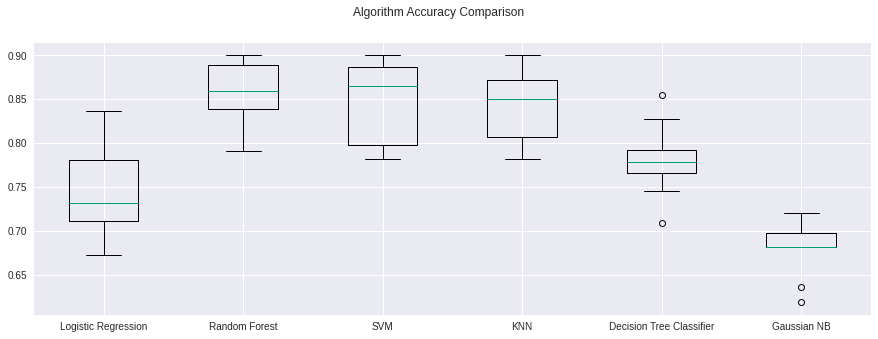

In [91]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#ROC AUC COMPARISON

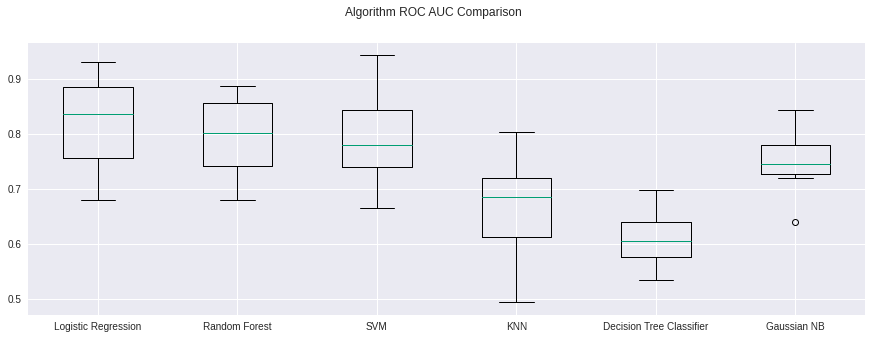

In [93]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Logistic rergression adn random forestt have given the highest AUC score 

In [94]:
#Random forest helps us to know which are the most important features to predict attrition

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

In [ ]:
#FEATURE IMPORTANCE

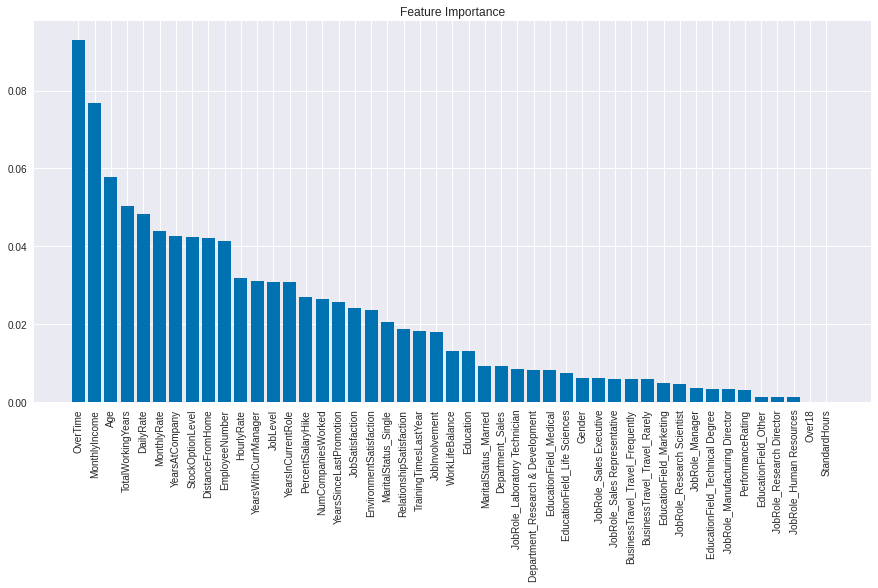

In [103]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances


plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()